# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [25]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + f'q={city}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})


    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
        
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | ponta delgada
Processing Record 3 of Set 1 | nuku'alofa
Processing Record 4 of Set 1 | belchatow
Processing Record 5 of Set 1 | tura
Processing Record 6 of Set 1 | st. john's
Processing Record 7 of Set 1 | grunberg
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | port mathurin
Processing Record 13 of Set 1 | kapa'a
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | vilyuchinsk
Processing Record 16 of Set 1 | ancud
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | wailua homesteads
Processing Record 19 of Set 1 | ketchikan
Processing Record 20 of Set 1 | afaahiti
Processing Record 21 of Set 1 | maba
Processing Record 22 of Set 1 | jamestown
Processing Record 

In [26]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [27]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,37.15,70,20,12.10,GS,1706033786
1,ponta delgada,37.7333,-25.6667,65.19,77,75,16.11,PT,1706033864
2,nuku'alofa,-21.1333,-175.2000,79.14,94,75,5.75,TO,1706033865
3,belchatow,51.3688,19.3567,39.97,91,98,14.58,PL,1706033865
4,tura,25.5198,90.2201,54.32,68,1,2.30,IN,1706033866


In [28]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [29]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,37.15,70,20,12.10,GS,1706033786
1,ponta delgada,37.7333,-25.6667,65.19,77,75,16.11,PT,1706033864
2,nuku'alofa,-21.1333,-175.2000,79.14,94,75,5.75,TO,1706033865
3,belchatow,51.3688,19.3567,39.97,91,98,14.58,PL,1706033865
4,tura,25.5198,90.2201,54.32,68,1,2.30,IN,1706033866


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

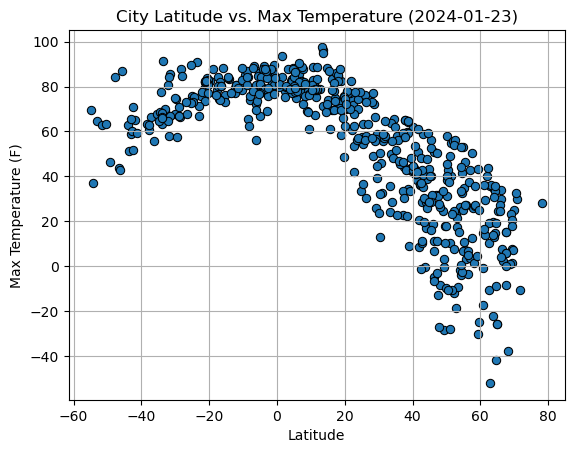

In [42]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df['Lat']
temperature = city_data_df['Max Temp']

# Incorporate the other graph properties
plt.scatter(latitude, temperature, edgecolors='black', linewidths=.75)
plt.title('City Latitude vs. Max Temperature (2024-01-23)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

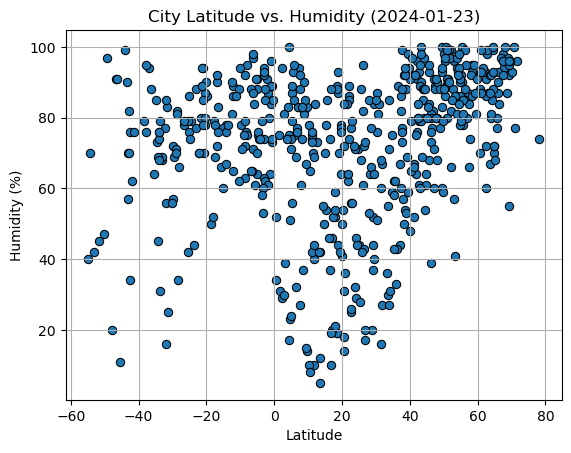

In [43]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df['Humidity']

# Incorporate the other graph properties
plt.scatter(latitude, humidity, edgecolors='black', linewidths=.75)
plt.title('City Latitude vs. Humidity (2024-01-23)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

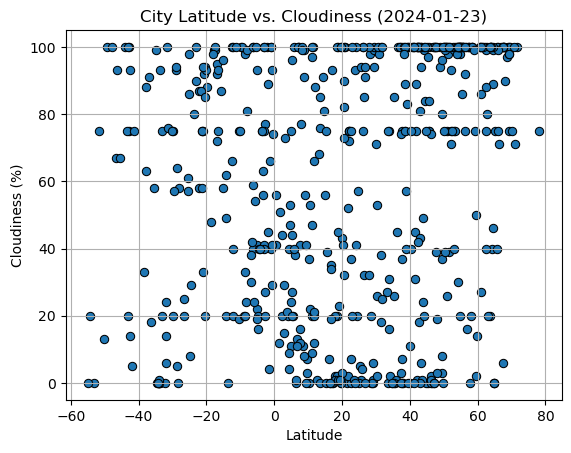

In [44]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = city_data_df['Cloudiness']

# Incorporate the other graph properties
plt.scatter(latitude, cloudiness, edgecolors='black', linewidths=.75)
plt.title('City Latitude vs. Cloudiness (2024-01-23)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

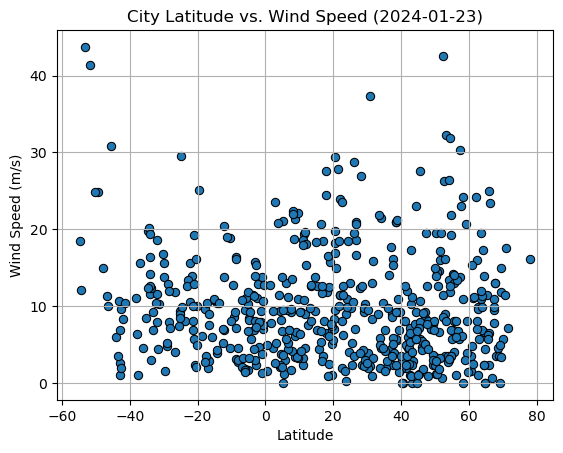

In [45]:
# Build the scatter plots for latitude vs. wind speed
wind_speed = city_data_df['Wind Speed']

# Incorporate the other graph properties
plt.scatter(latitude, wind_speed, edgecolors='black', linewidths=.75)
plt.title('City Latitude vs. Wind Speed (2024-01-23)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [52]:
# Define a function to create Linear Regression plots
def linregress_plot(x, y, coord):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f'The r-value is: {abs(rvalue)}')
    plt.scatter(x,y)
    plt.xlabel('Latitude')
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq, coord, fontsize=15, color='red')

In [48]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ponta delgada,37.7333,-25.6667,65.19,77,75,16.11,PT,1706033864
3,belchatow,51.3688,19.3567,39.97,91,98,14.58,PL,1706033865
4,tura,25.5198,90.2201,54.32,68,1,2.30,IN,1706033866
5,st. john's,47.5649,-52.7093,31.89,89,100,8.01,CA,1706033612
6,grunberg,50.5940,8.9587,42.80,89,100,14.43,DE,1706033866


In [49]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,37.15,70,20,12.10,GS,1706033786
2,nuku'alofa,-21.1333,-175.2000,79.14,94,75,5.75,TO,1706033865
7,waitangi,-43.9535,-176.5597,62.82,99,100,5.99,NZ,1706033867
10,adamstown,-25.0660,-130.1015,75.85,76,86,9.31,PN,1706033868
11,port mathurin,-19.6833,63.4167,82.54,86,88,25.12,MU,1706033868


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.8249281671902154


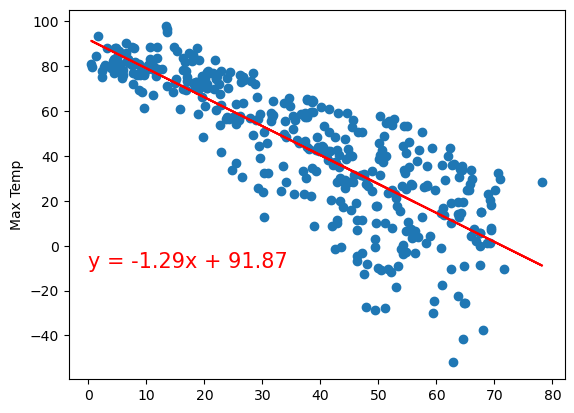

In [53]:
# Linear regression on Northern Hemisphere
latitude_northern = northern_hemi_df['Lat']
temperature_northern = northern_hemi_df['Max Temp']
northern_coordinates = (0, -10)
linregress_plot(latitude_northern, temperature_northern, northern_coordinates)
plt.ylabel("Max Temp")
plt.show()

The r-value is: 0.6376052294511466


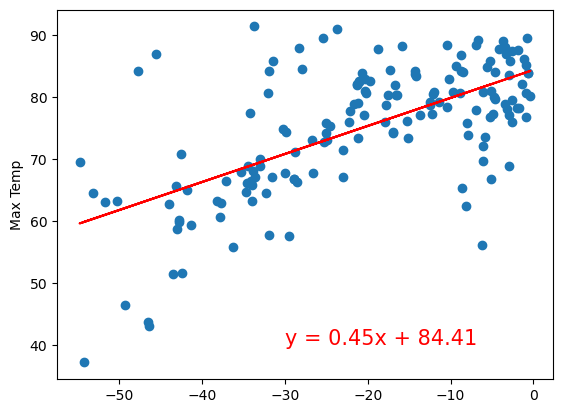

In [55]:
# Linear regression on Southern Hemisphere
latitude_southern = southern_hemi_df['Lat']
temperature_southern = southern_hemi_df['Max Temp']
southern_coordinates = (-30, 40)
linregress_plot(latitude_southern, temperature_southern, southern_coordinates)
plt.ylabel("Max Temp")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
humidity_northern = northern_hemi_df['Humidity']

In [ ]:
# Southern Hemisphere
humidity_southern = southern_hemi_df['Humidity']

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE